# 绘图

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = "Times New Roman"
# plt.rc('text', usetex=True)

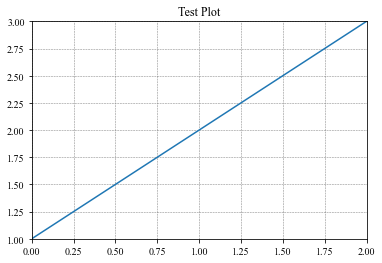

In [2]:
plt.plot([1, 2, 3])
plt.title("Test Plot")
plt.margins(0,0)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.savefig("./images/test2.png", bbox_inches='tight', dpi=300)

## 微调轮次对后门性能的影响

|task                     |CC     |BC     |CP     |BP     |
|:-----------------------:|:-----:|:-----:|:-----:|:-----:|
| sst2-1-64-2022-1-0-bd92 | 91.17 | 91.51 | 91.51 | 50.92 |
| sst2-2-64-2022-1-0-bd92 | 92.2  | 92.09 | 91.97 | 51.72 |
| sst2-3-64-2022-1-0-bd92 | 91.97 | 91.74 | 91.86 | 58.83 |
| sst2-4-64-2022-1-0-bd92 | 92.55 | 91.86 | 92.2  | 68.46 |
| sst2-5-64-2022-1-0-bd92 | 92.55 | 92.2  | 91.97 | 80.28 |
| sst2-6-64-2022-1-0-bd92 | 92.43 | 92.09 | 92.09 | 85.32 |
| sst2-7-64-2022-1-0-bd92 | 92.55 | 92.09 | 92.32 | 89.33 |
| sst2-8-64-2022-1-0-bd92 | 92.43 | 91.97 | 91.97 | 91.28 |

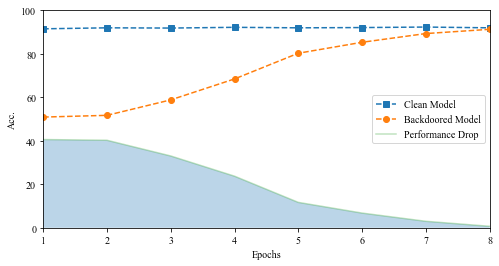

In [25]:
cp = [91.51, 91.97, 91.86, 92.2, 91.97, 92.09, 92.32, 91.97]
bp = [50.92, 51.72, 58.83, 68.46, 80.28, 85.32, 89.33, 91.28]
epochs = list(range(1, len(cp)+1))
ap = []

for i in range(len(epochs)):
    ap.append(cp[i]-bp[i])

plt.figure(figsize=(8, 4))
plt.plot(epochs, cp, label="Clean Model", marker="s", ls="--")
plt.plot(epochs, bp, label="Backdoored Model", marker="o", ls="--")
plt.plot(epochs, ap, label="Performance Drop", alpha=0.3)
plt.fill_between(epochs, y1=0, y2=ap, alpha=0.3)
plt.xlabel("Epochs")
plt.ylabel("Acc.")
plt.xlim(1, 8)
plt.ylim(0, 100)
plt.xticks(epochs)
plt.legend(loc="center right")
# plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, alpha=0.5)
plt.savefig("images/impact_of_epochs.png", bbox_inches='tight', dpi=300)

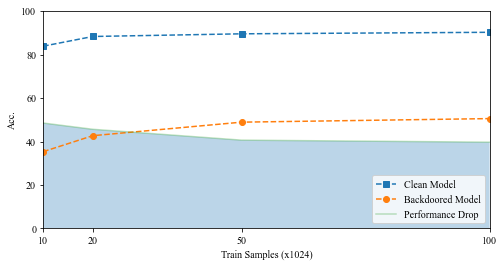

In [37]:
x = [10, 20, 50, 100]
cp = [83.84, 88.30,89.53, 90.23]
bp = [35.34, 42.68, 48.90, 50.54]
ap = []

for i in range(4):
    ap.append(cp[i]-bp[i])

plt.figure(figsize=(8, 4))
plt.plot(x, cp, label="Clean Model", marker="s", ls="--")
plt.plot(x, bp, label="Backdoored Model", marker="o", ls="--")
plt.plot(x, ap, label="Performance Drop", alpha=0.3)
plt.fill_between(x, y1=0, y2=ap, alpha=0.3)
plt.xlabel("Train Samples (x1024)")
plt.ylabel("Acc.")
plt.xlim(10, 100)
plt.ylim(0, 100)
plt.xticks(x)
plt.legend(loc="lower right")
plt.savefig("images/impact_of_samples.png", bbox_inches='tight', dpi=300)